<h1 align="center">Tarea 2 Especializacion en estadistica aplicada</h1>


- Nombre: Mateo Orozco Baldovino
- Especialidad en Estadistica Aplicada UTB

### Caracteristicas del entorno de desarrollo:
- Para el presente trabajo yo agarre el dataset desde este link (https://archive.ics.uci.edu/dataset/222/bank+marketing).
- Estoy realizando el analisis de este dataset usando python en visual studio code y jupyter notebook.
- Para las librerias utilizo un entorno virtual creado con conda.

Esta tarea puede ser encontrada en este repositorio
[Github](https://github.com/TheMaorba/DataMining.git)

La base de datos utilizada es acerca de una institucion bancaria portuguesa que realizo unas campañas de marketing directo utilizando llamadas telefonicas.

El objetivo de clasificación es predecir si el cliente suscribirá o no un depósito
El articulo puede ser encontrado en este link: https://repositorio.iscte-iul.pt/bitstream/10071/9499/5/dss_v3.pdf

## Punto 1: Descargue y cargue los datos en su notebook, usando Pandas preferiblemente. Imprima para tener una idea de los datos.

In [1]:
import respuestas as rp
import pandas as pd
import numpy as np
# Importando la base de datos
df0 = pd.read_csv(r"D:\Documentos\Especialidad\DataMining\Tarea2\Dataset\bank.csv", sep=";")
# Ver tipo de datos en las columnas
df0.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

## Punto 2: Calcule la cantidad de datos faltantes y luego si no tiene cree artificialmente datos faltantes.

In [2]:
print(f"La cantidad de datos faltantes inicialmente es de: {df0.isna().sum().sum()}")
from faltantes import GestorFaltantes
# Este codigo inserta los datos faltantes o NA y le asigna un nuevo nombre
df_conna = GestorFaltantes.insertar_nans(df0)
# Esta funcion muestra la cantidad de datos faltantes creados en el dataframe
GestorFaltantes.mostrar_nans(df_conna)
"""
En este codigo copio del df original para que no se modifique al momento de realizar los 
cambios
"""
# Para los modelos normales
df1 = df_conna.copy()
# Para KNN
df2 = df_conna.copy()

La cantidad de datos faltantes inicialmente es de: 0
📊 Dataset: 45211 filas × 17 columnas
🔎 Valores totales: 768587
❌ NaNs totales: 153714 (20.0%)

NaNs por columna:

Columna                   | NaNs       | % NaNs    
----------------------------------------------------------------------
age                       | 9042       | 20.0      
job                       | 9042       | 20.0      
marital                   | 9042       | 20.0      
education                 | 9042       | 20.0      
default                   | 9042       | 20.0      
balance                   | 9042       | 20.0      
housing                   | 9042       | 20.0      
loan                      | 9042       | 20.0      
contact                   | 9042       | 20.0      
day                       | 9042       | 20.0      
month                     | 9042       | 20.0      
duration                  | 9042       | 20.0      
campaign                  | 9042       | 20.0      
pdays                     | 9042  

## Punto 3: Use las metodologías vistas en clase para rellenar, o poner, datos en los lugares de los datos faltantes.

All the techniques to handle missing values

- Mean/Median/Mode replacement
- Random Sample Imputation
- Capturing NAN values with a new feature
- End of Distribution Imputation
- Arbitrary Imputation
- Frequent Categories Imputation

### Manejar datos faltantes mediante la eliminacion

In [3]:
# Voy a realizar unos cambios para eliminar columnas innecesarias
df1 = df1.drop([
    "housing","day","loan","contact","month", "duration", 
    "campaign", "pdays", "previous", "poutcome", "y"], axis=1)
# Este codigo lo realizo para realizar la eliminacion de los datos faltantes
df_drop = df1.dropna(axis=0)
print(f"La cantidad de datos faltantes actual en la base de datos es de: {df_drop.isna().sum().sum()}")

La cantidad de datos faltantes actual en la base de datos es de: 0


### Manejar datos faltantes imputando datos con un valor fijo o aleatorio

In [4]:
# Este codigo crea la columna age_random_fixed
GestorFaltantes.impute_nan_random(df1,"age",1)
print(f"""
      La cantidad de datos faltantes en la nueva columna creada es de: 
      {df1['age_random_fixed'].isna().sum().sum()}
      """)


      La cantidad de datos faltantes en la nueva columna creada es de: 
      0
      


## Manejar datos faltantes mediante imputacion por la media o mediana

In [5]:
from faltantes import GestorFaltantes
# Este codigo crea la columna age_mean
GestorFaltantes.impute_nan_meanmedian(df1, "age", "mean")
# Este codigo crea la columna age_median
GestorFaltantes.impute_nan_meanmedian(df1, "age", "median")
# Hasta este punto estan creadas las columnas age_random_fixed, age_mean y age_median
print(f"La cantidad de datos faltantes en la nueva columna age_mean es de: \
      {df1['age_mean'].isna().sum().sum()}")
print(f"La cantidad de datos faltantes en la nueva columna age_median es de: \
      {df1['age_median'].isna().sum().sum()}")

La cantidad de datos faltantes en la nueva columna age_mean es de:       0
La cantidad de datos faltantes en la nueva columna age_median es de:       0


Mediante KNN

In [6]:
from faltantes import GestorFaltantes
"""
Este codigo crea un nuevo dataframe df_KNN donde utiliza K neibors para asignar na
segun los valores cercanos
"""
df_KNN = GestorFaltantes.knn_imputer_dataframe(df2)
print(f"La cantidad de datos faltantes en el nuevo df es de: {(df_KNN.isna().sum().sum())}")
GestorFaltantes.mostrar_nans(df_KNN)

La cantidad de datos faltantes en el nuevo df es de: 90420
📊 Dataset: 45211 filas × 17 columnas
🔎 Valores totales: 768587
❌ NaNs totales: 90420 (11.76%)

NaNs por columna:

Columna                   | NaNs       | % NaNs    
----------------------------------------------------------------------
age                       | 0          | 0.0       
job                       | 9042       | 20.0      
marital                   | 9042       | 20.0      
education                 | 9042       | 20.0      
default                   | 9042       | 20.0      
balance                   | 0          | 0.0       
housing                   | 9042       | 20.0      
loan                      | 9042       | 20.0      
contact                   | 9042       | 20.0      
day                       | 0          | 0.0       
month                     | 9042       | 20.0      
duration                  | 0          | 0.0       
campaign                  | 0          | 0.0       
pdays                     | 

## Punto 4: Haga gráficos para evaluar la calidad de este llenado y las formas de las distribuciones.
### Evaluando el manejo de faltantes mediante asignacion aleatoria

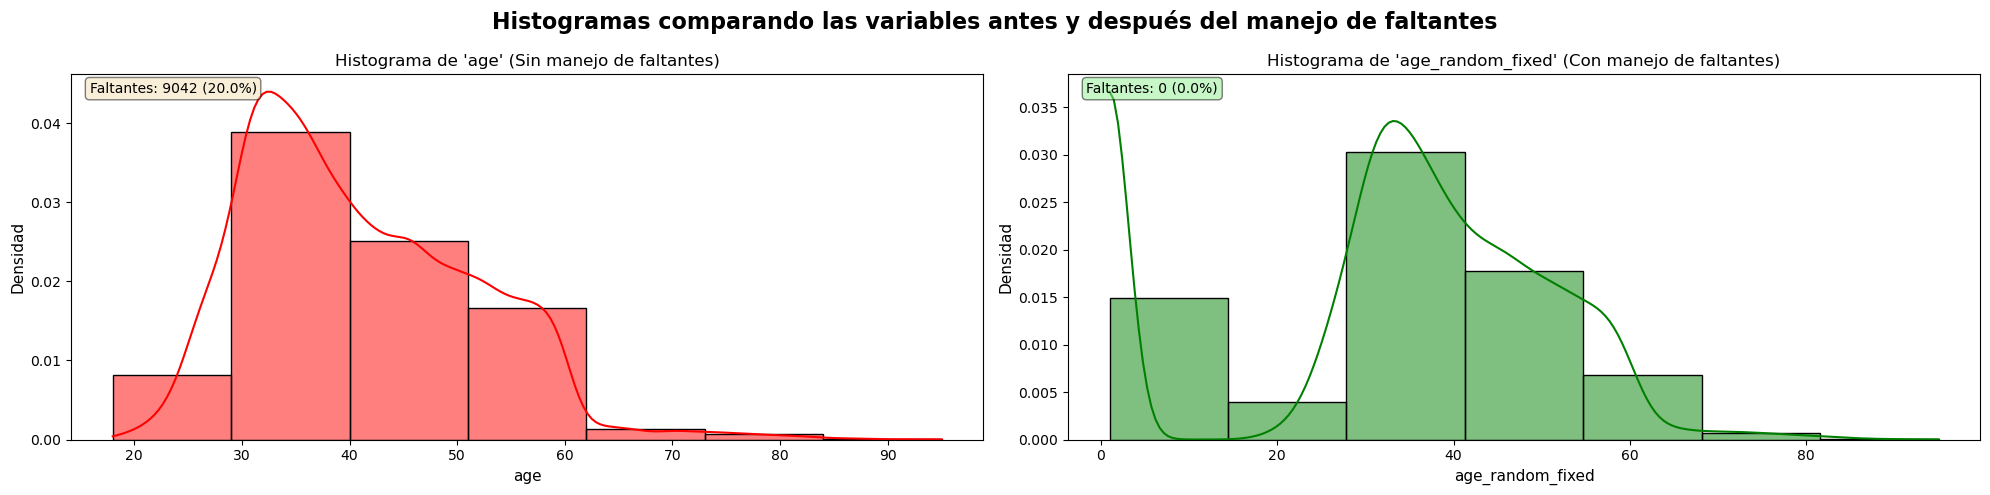

La media es: 32.94
La mediana es: 35.00
La desviacion estandar es: 18.58
La varianza es: 345.15
El rango es igual a: 94.00
La asimetria es de: -0.52
La curtosis es de: -0.48


In [7]:
from graficos import Graficos
# Hasta este punto estan creadas las columnas age_random_fixed, age_mean y age_median
Graficos.comparar_histogramas(
    df_original=df_conna,
    df_procesado=df1,
    columna_original='age',
    columna_procesada='age_random_fixed'
)
Graficos.estadisticas(df1, 'age_random_fixed')


Teniendo en cuenta la utilización de métodos para el rellenado de los datos faltantes en la columna age podemos destacar diferentes características según el método utilizado:
Histograma original: El histograma nos muestra que se generaron 9042 datos faltantes en la columna age que representa un 20% del total de los registros en esa columna. A su vez se nos muestra que los datos presentan una cola hacia la derecha lo que significa que los valores mas altos de edad presentan una menor frecuencia (asimetría positiva) y existen pocos casos con edades altas pero los hay
También es unimodal debido a que presenta un solo pico que es entre los 30 y 40 años

Al realizar el manejo de faltantes mediante el metodo de asignacion aleatoria podemos notar que el histograma cambia ligeramente. Entre los cambios mas destacados se muestran:
- Continua siendo un grafico unimodal con un solo pico entre los 30 y 40 años.
- El histograma tiende a convertirse en simetrico debido a la mayor cantidad de valores en el centro.
- 

### Evaluando metodo de imputacion por mediana

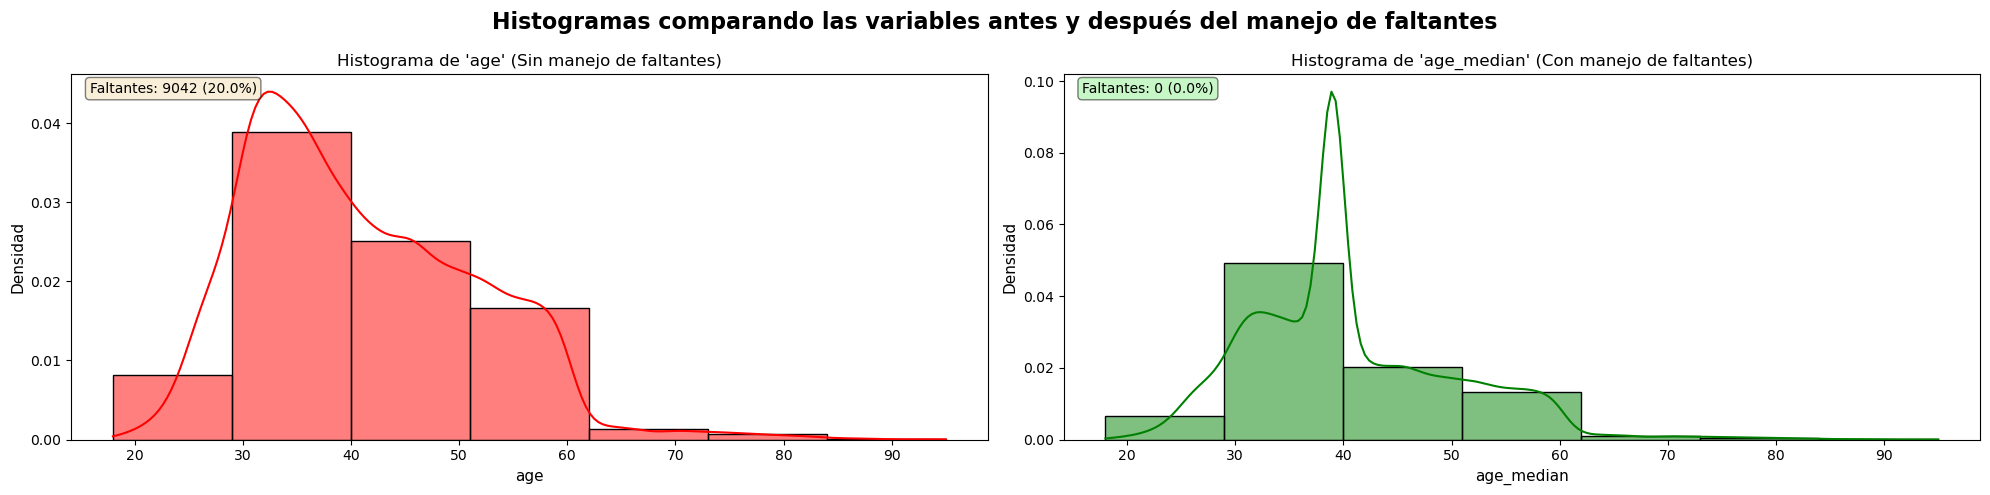

La media es: 40.54
La mediana es: 39.00
La desviacion estandar es: 9.52
La varianza es: 90.63
El rango es igual a: 77.00
La asimetria es de: 0.87
La curtosis es de: 1.20


In [8]:
Graficos.comparar_histogramas(
    df_original=df_conna,
    df_procesado=df1,
    columna_original='age',
    columna_procesada='age_median'
)

Graficos.estadisticas(df1, 'age_median')

### Evaluando metodo de imputacion por media

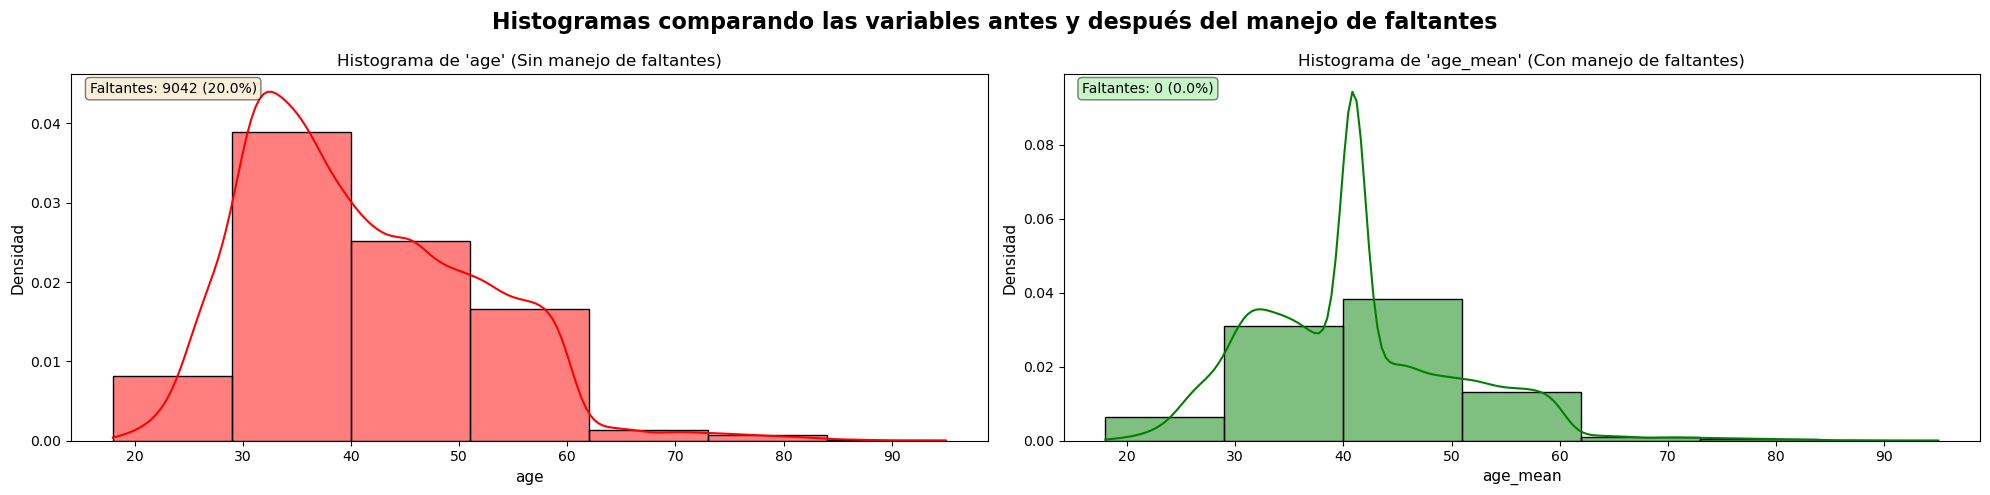

La media es: 40.93
La mediana es: 40.93
La desviacion estandar es: 9.49
La varianza es: 90.03
El rango es igual a: 77.00
La asimetria es de: 0.76
La curtosis es de: 1.12


In [9]:
Graficos.comparar_histogramas(
    df_original=df_conna,
    df_procesado=df1,
    columna_original='age',
    columna_procesada='age_mean'
)

Graficos.estadisticas(df1, 'age_mean')

### Evaluando manejo mediante la eliminacion

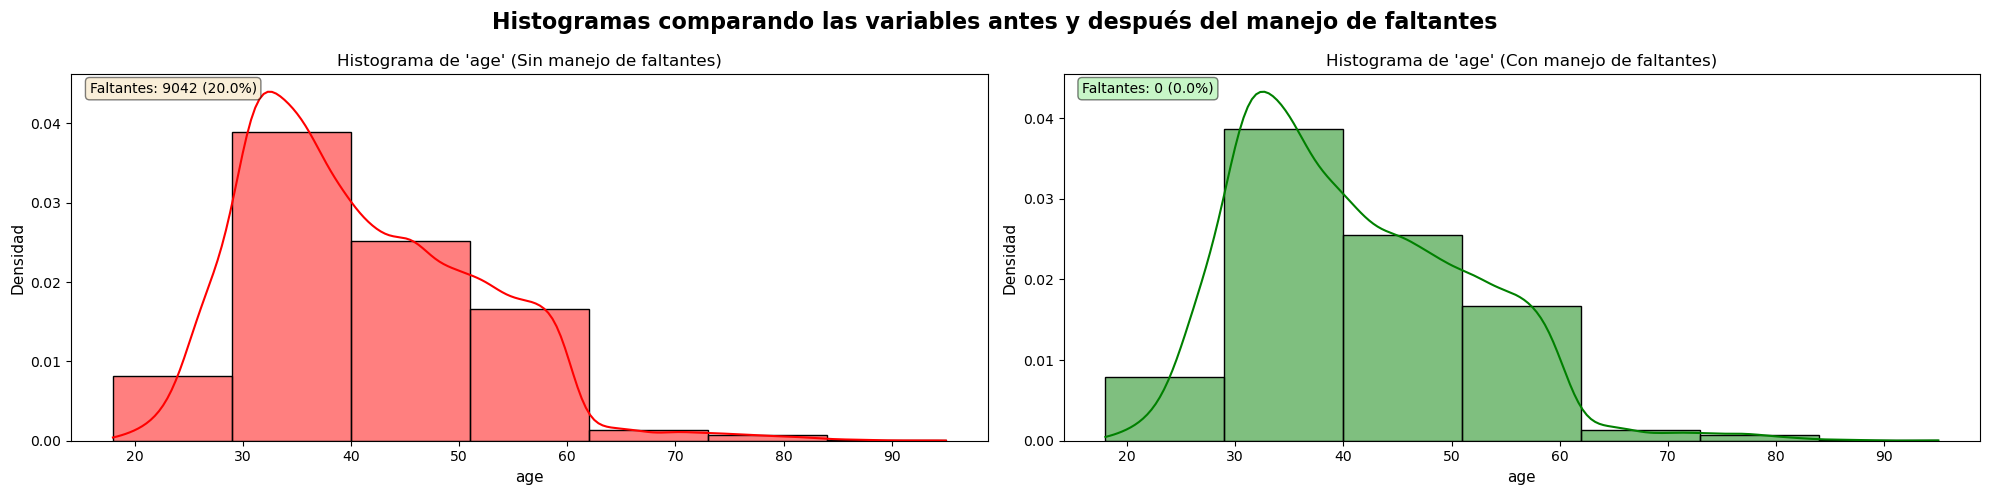

La media es: 40.98
La mediana es: 39.00
La desviacion estandar es: 10.58
La varianza es: 111.93
El rango es igual a: 77.00
La asimetria es de: 0.66
La curtosis es de: 0.25


In [10]:
Graficos.comparar_histogramas(
    df_original=df_conna,
    df_procesado=df_drop,
    columna_original='age',
    columna_procesada='age'
)

Graficos.estadisticas(df_drop, 'age')

Punto 5: Escriba conclusiones acerca del proceso, ¿Qué metodología de imputación le sirvió mejor?

Punto 6: Determine si tiene datos outliers o datos extremos y diga cuales son y elimínelos. La
información para esta tarea está en el primer notebook.

d:\Documentos\Especialidad\DataMining\Tarea2\graficos.py:93: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(fontsize=16)


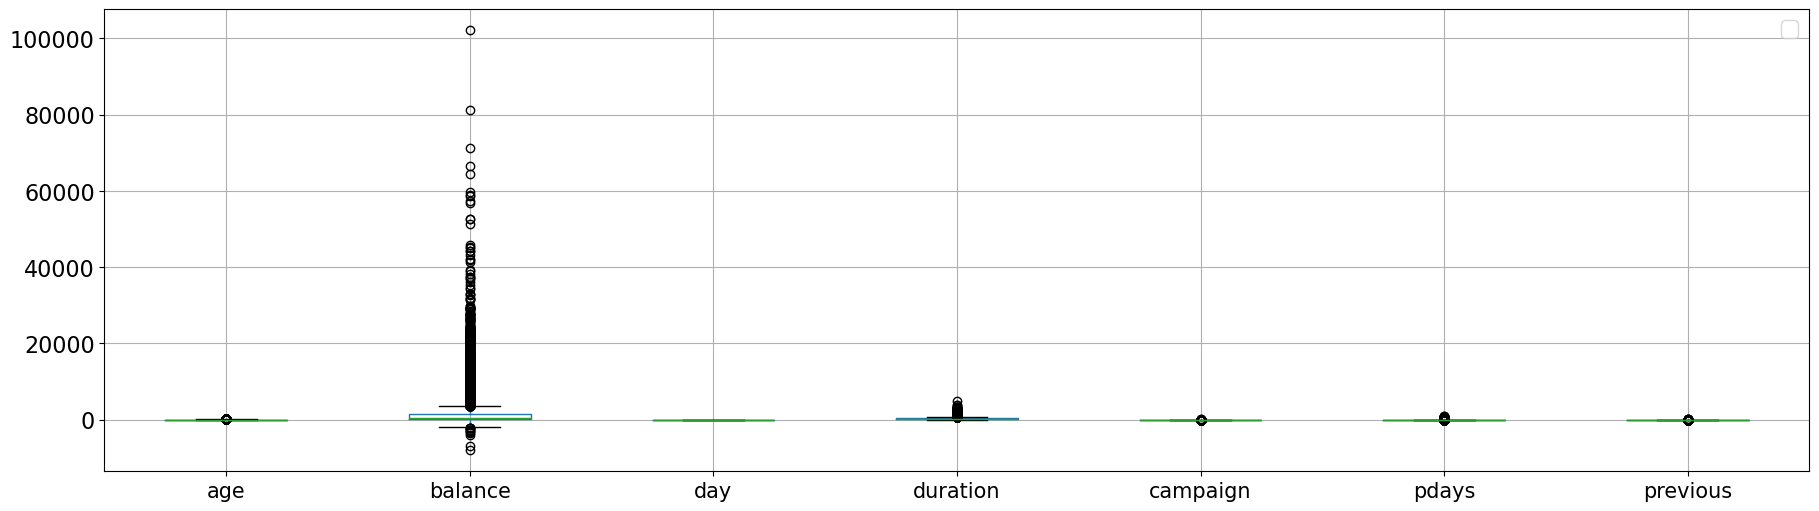

In [11]:
Graficos.ver_outliers (df_KNN)

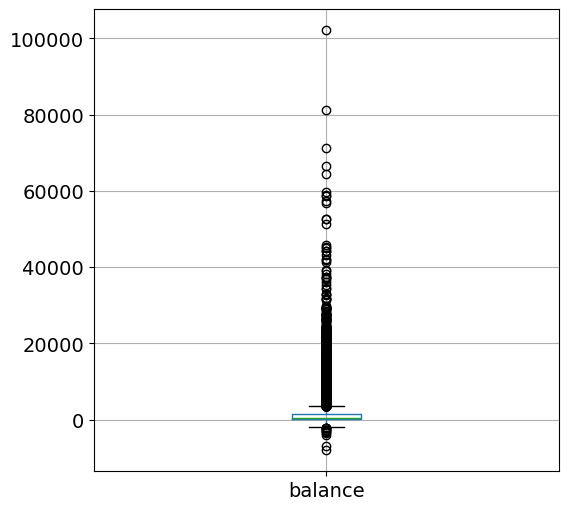

In [12]:
Graficos.ver_outliers_columna(df_KNN, "balance")

Punto 7: Adicionalmente use los algoritmos que encontrará en el segundo notebook (linear_regresion) para inferir regresiones, determine parámetros, determine el grado de regresión o coeficiente de regresión (bondad de ajuste) y escriba conclusiones.

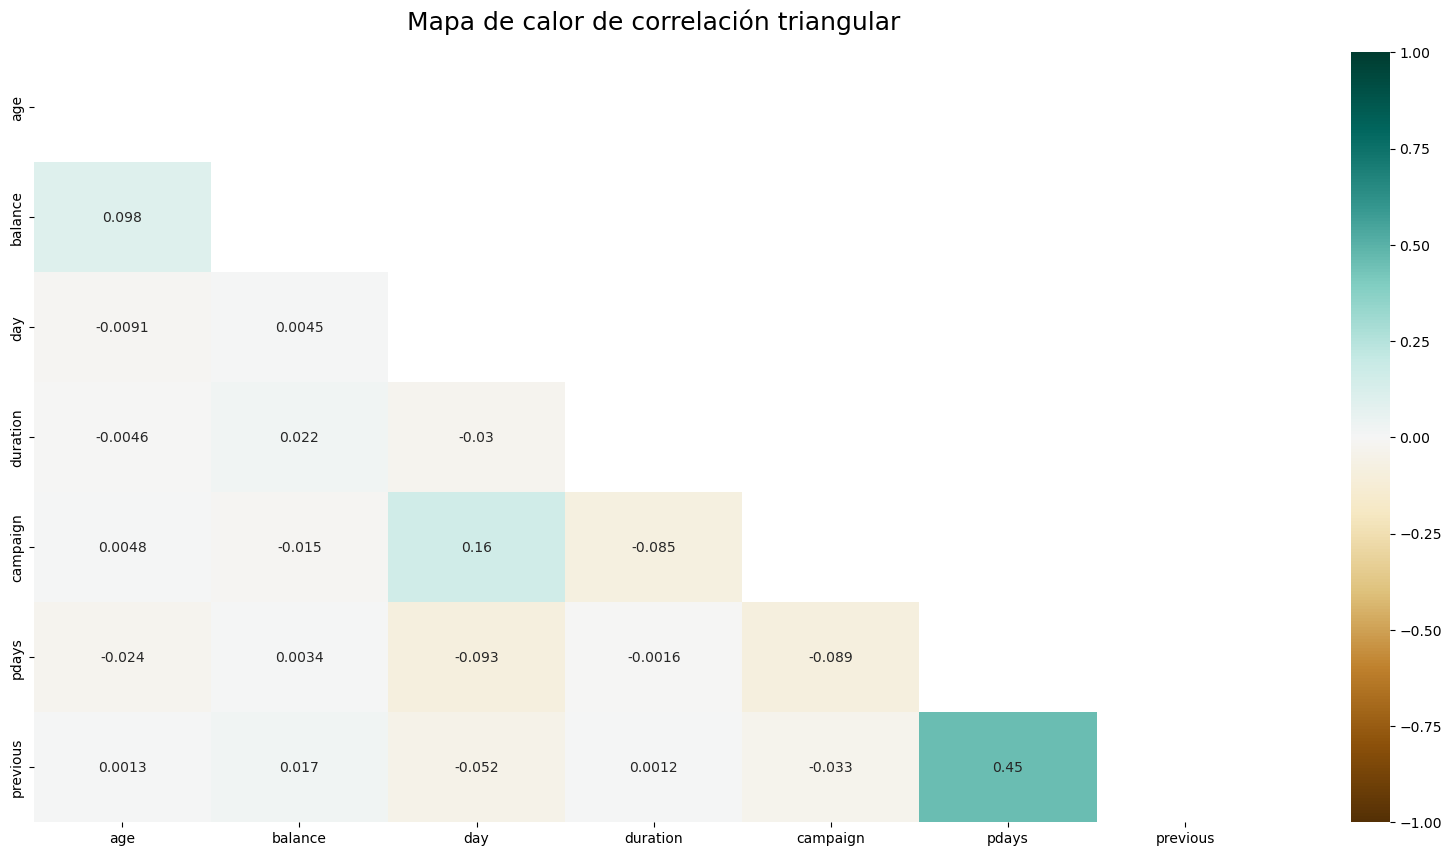

In [13]:
from regresiones import Inferencia
Inferencia.correlation_heatmap(df0)

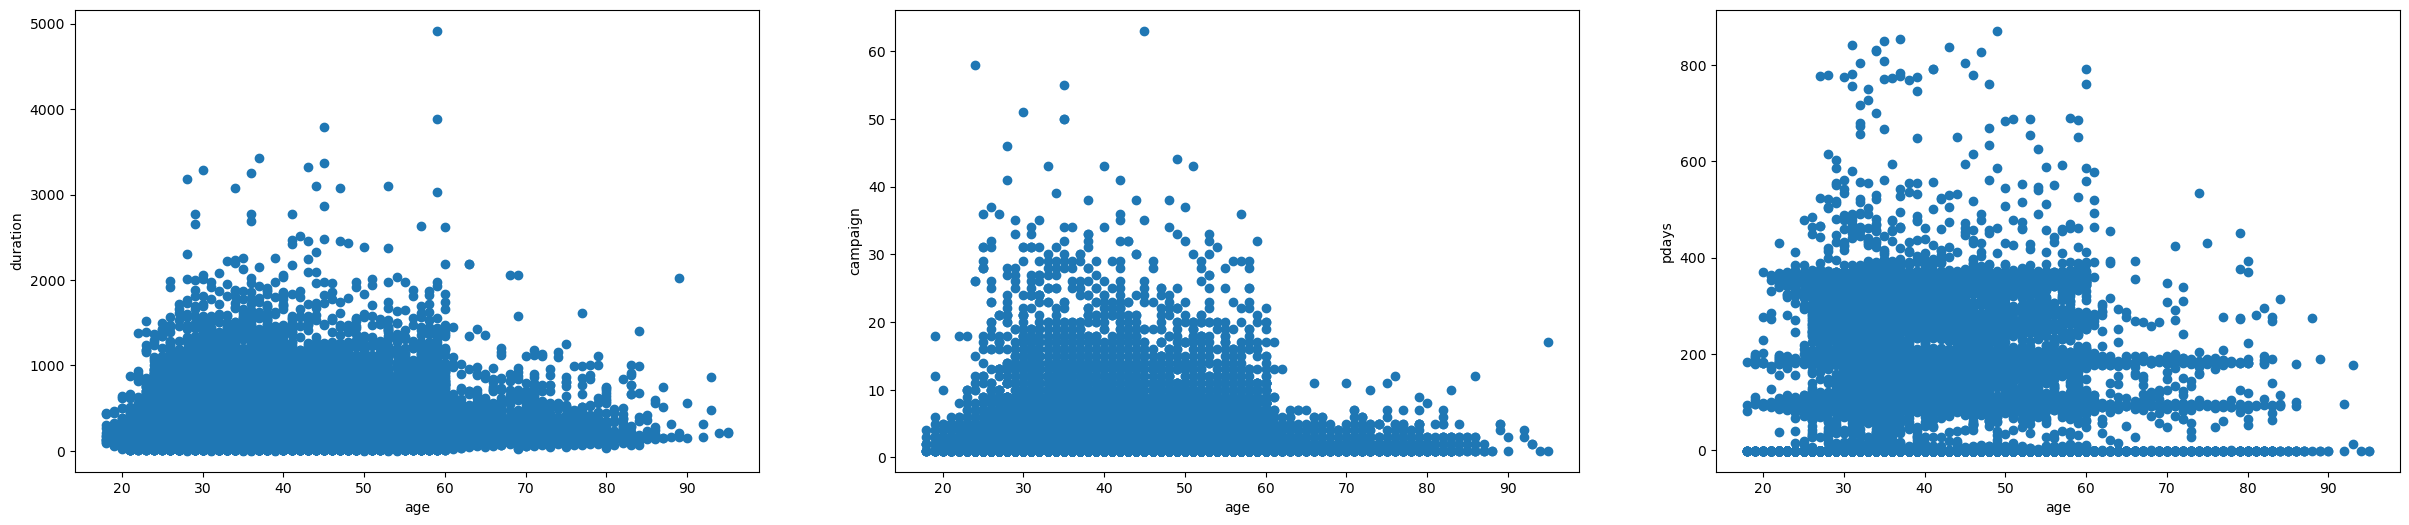

In [14]:
import matplotlib.pyplot as plt

plt.figure(figsize=(30,6))

# Edad vs duración de la llamada 
plt.subplot(131)
plt.scatter(df0["age"], df0["duration"])
plt.xlabel("age")
plt.ylabel("duration")

# Edad vs número de contactos en la campaña actual
plt.subplot(132)
plt.scatter(df0["age"], df0["campaign"])
plt.xlabel("age")
plt.ylabel("campaign")

# Edad vs días desde el último contacto previo
plt.subplot(133)
plt.scatter(df0["age"], df0["pdays"])
plt.xlabel("age")
plt.ylabel("pdays")

plt.show()

In [15]:
from scipy import optimize
import random
def f( x, p0, p1):
    return p0+p1*x

def ff(x, p):
    return f(x, *p)

def fit_leastsq(p0, datax, datay, function):

    errfunc = lambda p, x, y: function(x,p) - y

    pfit, pcov, infodict, errmsg, success = optimize.leastsq(errfunc, p0, args=(datax, datay), full_output=1, epsfcn=0.0001)

    if (len(datay) > len(p0)) and pcov is not None:
        s_sq = (errfunc(pfit, datax, datay)**2).sum()/(len(datay)-len(p0))
        pcov = pcov * s_sq
    else:
        pcov = np.inf

    error = [] 
    for i in range(len(pfit)):
        try:
            error.append(np.absolute(pcov[i][i])**0.5)
        except:
            error.append( 0.00 )
    pfit_leastsq = pfit
    perr_leastsq = np.array(error) 
    return pfit_leastsq, perr_leastsq 

# These are the true parameters
p0,p1 = 1.0, 1.0
# These are initial guesses for fits:
pstart = [p0+random.random(),p1+random.random()]
pfit, perr = fit_leastsq(pstart, df0["age"], df0["duration"], ff)

print("\n# Fit parameters and parameter errors from lestsq method :")
print("pfit = ", pfit)
print("perr = ", perr)


# Fit parameters and parameter errors from lestsq method :
pfit =  [ 2.62777998e+02 -1.12734386e-01]
perr =  [4.82370889 0.11405993]


In [16]:
err_stdev = 0.2
def fit_curvefit(p0, datax, datay, function, yerr=err_stdev, **kwargs):
    """
    Note: As per the current documentation (Scipy V1.1.0), sigma (yerr) must be:
        None or M-length sequence or MxM array, optional
    Therefore, replace:
        err_stdev = 0.2
    With:
        err_stdev = [0.2 for item in xdata]
    Or similar, to create an M-length sequence for this example.
    """
    pfit, pcov = optimize.curve_fit(f,datax,datay,p0=p0, sigma=None, epsfcn=0.0001, **kwargs)
    error = [] 
    for i in range(len(pfit)):
        try:
            error.append(np.absolute(pcov[i][i])**0.5)
        except:
            error.append( 0.00 )
    pfit_curvefit = pfit
    perr_curvefit = np.array(error)
    return pfit_curvefit, perr_curvefit 

pfit, perr = fit_curvefit(pstart, df0["age"], df0["duration"], ff)

print("\n# Fit parameters and parameter errors from curve_fit method :")
print("pfit = ", pfit)
print("perr = ", perr)


# Fit parameters and parameter errors from curve_fit method :
pfit =  [ 2.62777998e+02 -1.12734386e-01]
perr =  [4.82370889 0.11405993]


In [17]:
def fit_bootstrap(p0, datax, datay, function, yerr_systematic=0.0):

    errfunc = lambda p, x, y: function(x,p) - y

    # Fit first time
    pfit, perr = optimize.leastsq(errfunc, p0, args=(datax, datay), full_output=0)


    # Get the stdev of the residuals
    residuals = errfunc(pfit, datax, datay)
    sigma_res = np.std(residuals)

    sigma_err_total = np.sqrt(sigma_res**2 + yerr_systematic**2)

    # 100 random data sets are generated and fitted
    ps = []
    for i in range(100):

        randomDelta = np.random.normal(0., sigma_err_total, len(datay))
        randomdataY = datay + randomDelta
        randomfit, randomcov = optimize.leastsq(errfunc, p0, args=(datax, randomdataY), full_output=0)
        ps.append(randomfit) 

    ps = np.array(ps)
    mean_pfit = np.mean(ps,0)

    # You can choose the confidence interval that you want for your
    # parameter estimates: 
    Nsigma = 1. # 1sigma gets approximately the same as methods above
                # 1sigma corresponds to 68.3% confidence interval
                # 2sigma corresponds to 95.44% confidence interval
    err_pfit = Nsigma * np.std(ps,0) 

    pfit_bootstrap = mean_pfit
    perr_bootstrap = err_pfit
    return pfit_bootstrap, perr_bootstrap 

pfit, perr = fit_bootstrap(pstart, df0["age"], df0["duration"], ff)

print("\n# Fit parameters and parameter errors from bootstrap method :")
print("pfit = ", pfit)
print("perr = ", perr)


# Fit parameters and parameter errors from bootstrap method :
pfit =  [ 2.62287418e+02 -1.06101374e-01]
perr =  [4.9641103  0.11163684]


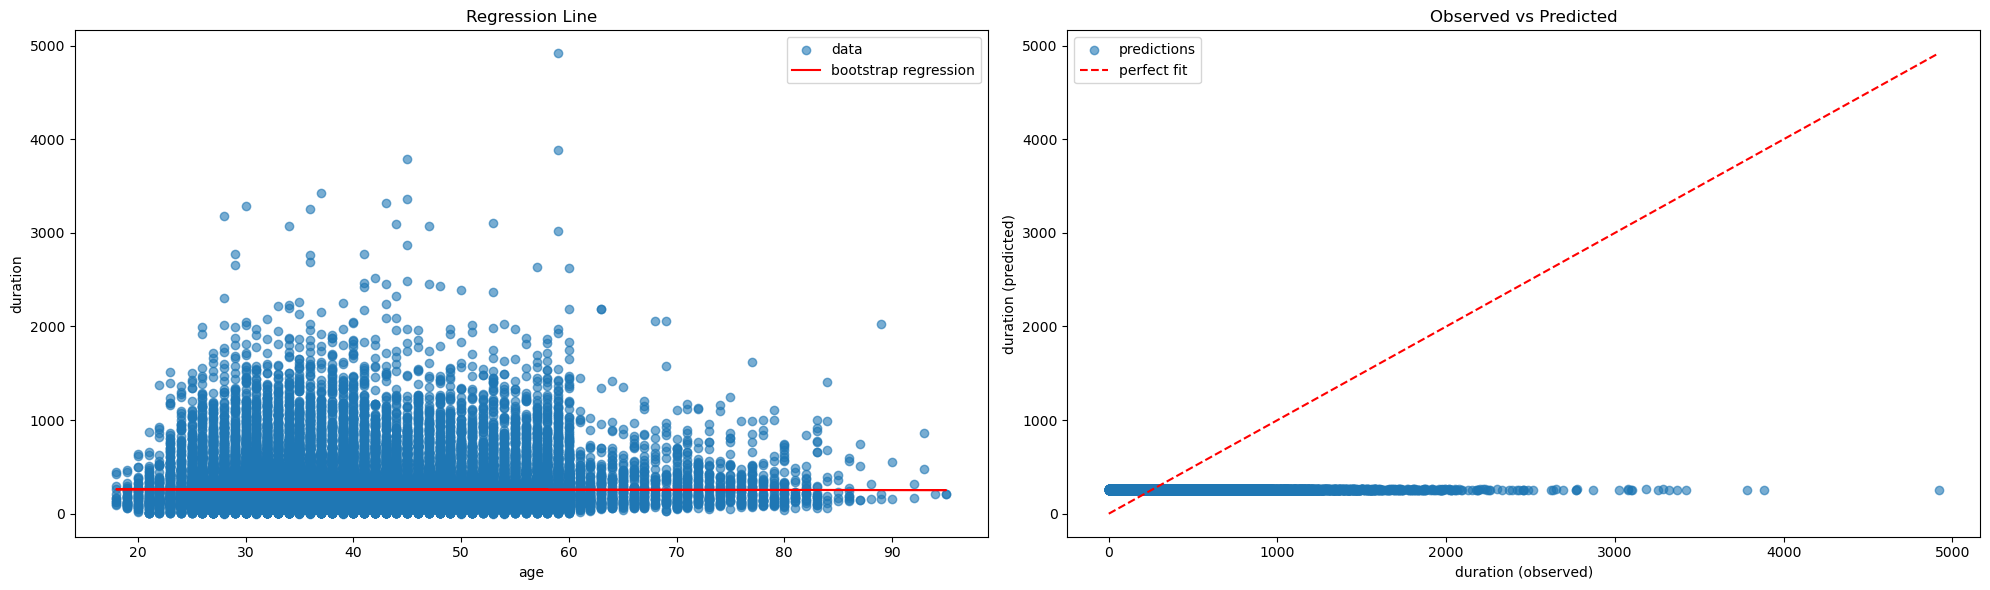

In [18]:
plt.figure(figsize=(20,6))

# Subplot 1: Datos originales con línea de regresión
plt.subplot(121)  # Cambiado a 121 si solo usas 2 gráficos
plt.scatter(df0['age'], df0['duration'], label="data", alpha=0.6)
x0 = df0['age']
plt.plot(x0, f(x0, *pfit), color="r", label="bootstrap regression")
plt.xlabel("age")
plt.ylabel("duration")
plt.legend()
plt.title("Regression Line")

# Subplot 2: Observado vs Predicho
plt.subplot(122)
y_pred = f(df0['age'], *pfit)  # Predicciones usando age
plt.scatter(df0['duration'], y_pred, label="predictions", alpha=0.6)

# Línea de ajuste perfecto
dmin = min(df0['duration'].min(), y_pred.min())
dmax = max(df0['duration'].max(), y_pred.max())
plt.plot([dmin, dmax], [dmin, dmax], color="r", linestyle="--", label="perfect fit")

plt.xlabel("duration (observed)")
plt.ylabel("duration (predicted)")
plt.legend()
plt.title("Observed vs Predicted")

plt.tight_layout()
plt.show()

In [19]:
from sklearn.metrics import r2_score
r2 = r2_score(df0["duration"], f(x0,*pfit))
print('r2 score for perfect model is', r2)

r2 score for perfect model is 2.0809568291979552e-05


In [20]:
def r2_hand(y,yhat):
    SST=np.sum((y-np.mean(y))**2)
    SSE=np.sum((y-yhat)**2)
    R2=(SST-SSE)/SST
    return R2
print('r2 score for perfect model is', r2_hand(df0["duration"], f(x0,*pfit)))

r2 score for perfect model is 2.0809568291965447e-05


In [21]:
import statsmodels.api as sm
from statsmodels.tools.eval_measures import rmse
from statsmodels.stats.outliers_influence import variance_inflation_factor 

X = df0['age']   # independent variables
y = df0['duration']   # dependent variables

# to get intercept -- this is optional
X = sm.add_constant(X)

# fit the regression model
reg = sm.OLS(y, X).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               duration   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.9769
Date:                Wed, 14 Jan 2026   Prob (F-statistic):              0.323
Time:                        00:48:06   Log-Likelihood:            -3.1512e+05
No. Observations:               45211   AIC:                         6.302e+05
Df Residuals:                   45209   BIC:                         6.303e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        262.7780      4.824     54.476      0.000     253.323     272.233
age           -0.1127      0.114     -0.988      0.323      -0.336       0.111
==============================================================================
Omnibus:                    31837.535   Durbin-Watson:                   1.906
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           695882.850
Skew:                           3.145   Prob(JB):                         0.00
Kurtosis:                      21.162   Cond. No.                         169.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [22]:
X = df0[['age','previous',"balance","campaign"]]   # independent variables
y = df0['duration']   # dependent variables

# to get intercept -- this is optional
X = sm.add_constant(X)

# fit the regression model
reg = sm.OLS(y, X).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               duration   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     86.64
Date:                Wed, 14 Jan 2026   Prob (F-statistic):           1.85e-73
Time:                        00:48:06   Log-Likelihood:            -3.1495e+05
No. Observations:               45211   AIC:                         6.299e+05
Df Residuals:                   45206   BIC:                         6.300e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        281.4873      4.932     57.074      0.000     271.820     291.154
age           -0.1527      0.114     -1.337      0.181      -0.376       0.071
previous      -0.2133      0.524     -0.407      0.684      -1.241       0.814
balance        0.0018      0.000      4.455      0.000       0.001       0.003
campaign      -7.0073      0.390    -17.980      0.000      -7.771      -6.243
==============================================================================
Omnibus:                    32090.370   Durbin-Watson:                   1.913
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           712854.564
Skew:                           3.176   Prob(JB):                         0.00
Kurtosis:                      21.387   Cond. No.                     1.36e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.36e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [23]:
# importing train_test_split from sklearn
from sklearn.model_selection import train_test_split
# splitting the data
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [24]:
# importing module
from sklearn.linear_model import LinearRegression
# creating an object of LinearRegression class
LR = LinearRegression()
# fitting the training data
LR.fit(x_train,y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [25]:
y_prediction =  LR.predict(x_test)
y_prediction

array([268.00272213, 265.78742922, 271.4005712 , ..., 263.98339652,
       261.3483315 , 265.06933041])

In [26]:
# importing r2_score module
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
# predicting the accuracy score
score=r2_score(y_test,y_prediction)
print("r2 socre is ",score)
print("mean_sqrd_error is==",mean_squared_error(y_test,y_prediction))
print("root_mean_squared error of is==",np.sqrt(mean_squared_error(y_test,y_prediction)))

r2 socre is  0.004749759480813798
mean_sqrd_error is== 67291.42646409725
root_mean_squared error of is== 259.40591061904746


In [27]:
y_prediction_all =  LR.predict(X)

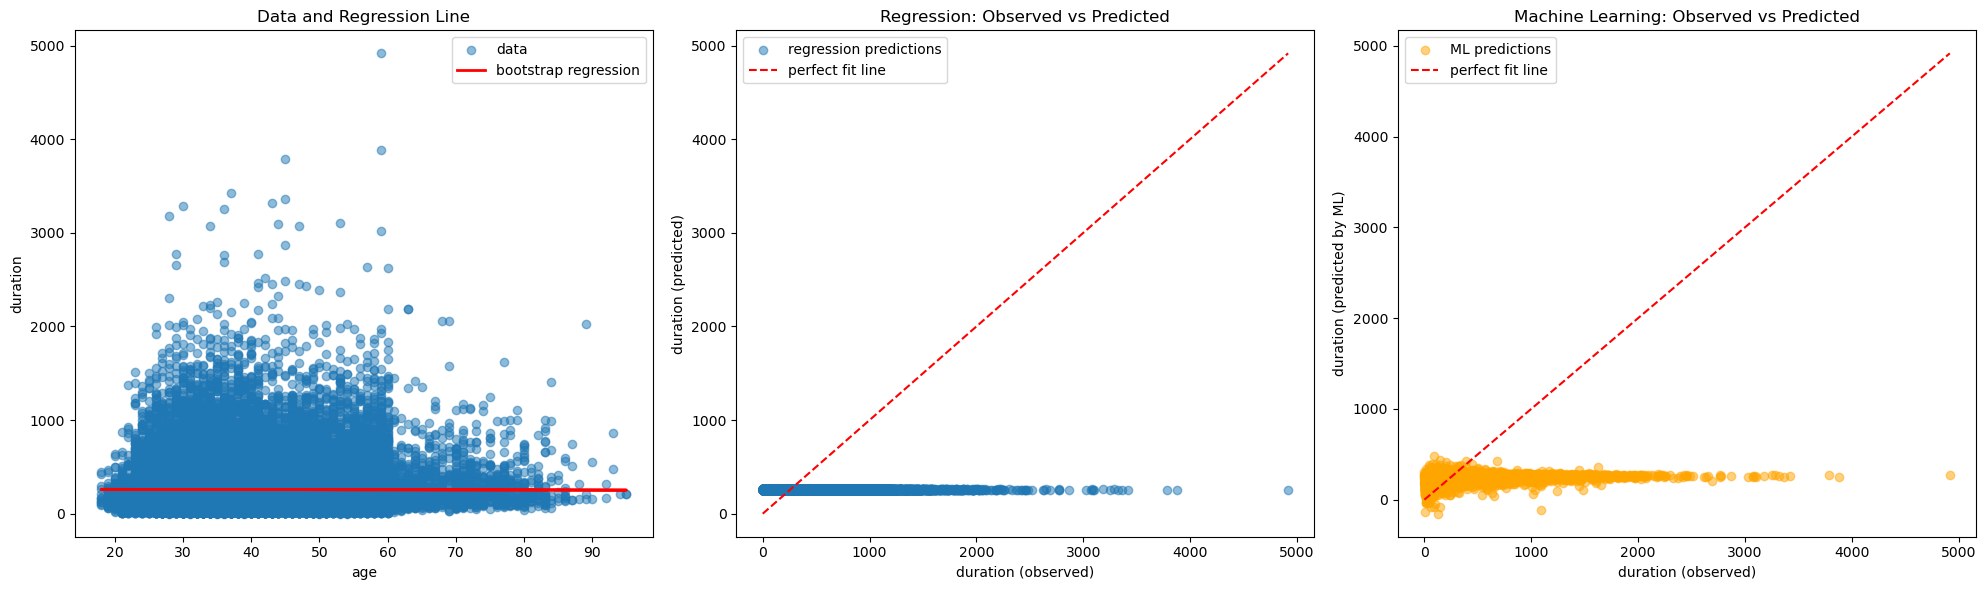

In [28]:
plt.figure(figsize=(20,6))  # Ajustado el tamaño

# Gráfico 1: Datos originales con regresión
plt.subplot(131)
plt.scatter(df0['age'], df0['duration'], label="data", alpha=0.5)
x0 = df0['age']
plt.plot(x0, f(x0, *pfit), color="r", linewidth=2, label="bootstrap regression")
plt.xlabel("age")
plt.ylabel("duration")
plt.legend()
plt.title("Data and Regression Line")

# Gráfico 2: Valores observados vs predichos (regresión)
plt.subplot(132)
y_pred_regression = f(df0['age'], *pfit)  # Predicciones de la regresión
plt.scatter(df0['duration'], y_pred_regression, label="regression predictions", alpha=0.5)
plt.plot([df0['duration'].min(), df0['duration'].max()], 
         [df0['duration'].min(), df0['duration'].max()], 
         color="r", linestyle="--", label="perfect fit line")
plt.xlabel("duration (observed)")
plt.ylabel("duration (predicted)")
plt.legend()
plt.title("Regression: Observed vs Predicted")

# Gráfico 3: Valores observados vs predichos (ML)
plt.subplot(133)
plt.scatter(y, y_prediction_all, color="orange", alpha=0.5, label="ML predictions")
plt.plot([y.min(), y.max()], [y.min(), y.max()], 
         color="r", linestyle="--", label="perfect fit line")
plt.xlabel("duration (observed)")
plt.ylabel("duration (predicted by ML)")
plt.legend()
plt.title("Machine Learning: Observed vs Predicted")

plt.tight_layout()
plt.show()

In [29]:
# predicting the accuracy score
score=r2_score(y,y_prediction_all)
print("r2 socre is ",score)
print("mean_sqrd_error is==",mean_squared_error(y,y_prediction_all))
print("root_mean_squared error of is==",np.sqrt(mean_squared_error(y,y_prediction_all)))

r2 socre is  0.0075565786181767125
mean_sqrd_error is== 65817.9616304634
root_mean_squared error of is== 256.55011524157106


Punto 8: Conclusiones